# Predicting what will be the order amount from a company representative based on historical data of purchases and orders from the rep.

**The preprocessed data comes from the upstream**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import all_estimators
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV



import warnings

warnings.filterwarnings("ignore")

## Load the preprocessed data from upstream

In [3]:
df = pd.read_csv("C:/Users/cvmda/code/data/ds/manu_demand_forecast/Preprocessed_data.csv")
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,uniue_cust_id
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1040.5249,12315027
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,858.2224,12315027
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,73567.8714,12122018
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1532.0386,1210503060
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0000,1210354690


In [4]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [5]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
scaler = StandardScaler()
for col in num_cols:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

In [6]:
df.rename(columns = {'amount_in_usd': 'target'}, inplace = True)

In [7]:
df.dropna(inplace = True)

X = df.drop(columns = ['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 355)

### Try different regression models in below models -
- Linear Regression
- Support Vector Machine
- Decision Tree
- Random Forest
- AdaBoost
- Xgboost etc.

In [8]:
regressor_models = []
for name, RegressorClass in all_estimators(type_filter='regressor'):
    try:
        regressor = RegressorClass()
        regressor_models.append((name, regressor))
    except Exception as e:
        pass

regressor_models.pop(33)
regressor_models.pop(46)

('SVR', SVR())

In [9]:
def eval(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'{model.__class__.__name__} \nTest R2: {r2} \n============================================')
    return model.__class__.__name__, model, mse, rmse, r2

In [10]:
df_compare = pd.DataFrame(columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])
best_model = pd.DataFrame(columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])

In [11]:
regressor_models

[('ARDRegression', ARDRegression()),
 ('AdaBoostRegressor', AdaBoostRegressor()),
 ('BaggingRegressor', BaggingRegressor()),
 ('BayesianRidge', BayesianRidge()),
 ('CCA', CCA()),
 ('DecisionTreeRegressor', DecisionTreeRegressor()),
 ('DummyRegressor', DummyRegressor()),
 ('ElasticNet', ElasticNet()),
 ('ElasticNetCV', ElasticNetCV()),
 ('ExtraTreeRegressor', ExtraTreeRegressor()),
 ('ExtraTreesRegressor', ExtraTreesRegressor()),
 ('GammaRegressor', GammaRegressor()),
 ('GaussianProcessRegressor', GaussianProcessRegressor()),
 ('GradientBoostingRegressor', GradientBoostingRegressor()),
 ('HistGradientBoostingRegressor', HistGradientBoostingRegressor()),
 ('HuberRegressor', HuberRegressor()),
 ('IsotonicRegression', IsotonicRegression()),
 ('KNeighborsRegressor', KNeighborsRegressor()),
 ('KernelRidge', KernelRidge()),
 ('Lars', Lars()),
 ('LarsCV', LarsCV()),
 ('Lasso', Lasso()),
 ('LassoCV', LassoCV()),
 ('LassoLars', LassoLars()),
 ('LassoLarsCV', LassoLarsCV()),
 ('LassoLarsIC', Lass

In [12]:
X = df.drop(columns = ['ORDER_AMOUNT'])
y = df['ORDER_AMOUNT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 355)

In [11]:
selected_regressors = ["DecisionTreeRegressor", "ElasticNetCV", "ExtraTreeRegressor", "ExtraTreesRegressor", "KNeighborsRegressor", "LinearRegression", "RandomForestRegressor"]
for model in regressor_models[:30]:
    try:
        ans = eval(model[1], X_train, y_train, X_test, y_test)
        df_compare = pd.concat([df_compare, pd.DataFrame([[ans[1], ans[0], ans[2], ans[3], ans[4]]], columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])])
    except Exception as e:
        pass

ARDRegression 
Test R2: -0.004478941474693077 
AdaBoostRegressor 
Test R2: 0.0823346072928628 
BaggingRegressor 
Test R2: 0.9767486534141704 
BayesianRidge 
Test R2: 0.002200119668424816 
DecisionTreeRegressor 
Test R2: 0.9790845599497644 
DummyRegressor 
Test R2: -5.227615484493242e-06 
ElasticNet 
Test R2: 0.014637215906657564 
ElasticNetCV 
Test R2: 0.014252691882874036 
ExtraTreeRegressor 
Test R2: 0.9898708611866904 
ExtraTreesRegressor 
Test R2: 0.9906220149473933 
GradientBoostingRegressor 
Test R2: 0.9696045362188864 
HistGradientBoostingRegressor 
Test R2: 0.9439748889679699 
HuberRegressor 
Test R2: -0.007912237954658341 
KNeighborsRegressor 
Test R2: -0.06743581385830888 
Lars 
Test R2: 0.0020316692541005876 
LarsCV 
Test R2: 0.002535087924155799 
Lasso 
Test R2: 0.01437086241851493 
LassoCV 
Test R2: 0.014253001860363379 
LassoLars 
Test R2: 0.014370862411709595 
LassoLarsCV 
Test R2: 0.002535087924155799 
LassoLarsIC 
Test R2: 0.0024739134518025896 
LinearRegression 
Test 

In [12]:
df_compare

,Regressor,Model,MSE,RMSE,R2
0,ARDRegression(),ARDRegression,3.225647,1.796009,-0.004479
0,"(DecisionTreeRegressor(max_depth=3, random_sta...",AdaBoostRegressor,2.946866,1.716644,0.082335
0,(DecisionTreeRegressor(random_state=1344143399...,BaggingRegressor,0.074666,0.273251,0.976749
0,BayesianRidge(),BayesianRidge,3.204199,1.790028,0.002200
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.067165,0.259162,0.979085
0,DummyRegressor(),DummyRegressor,3.211281,1.792005,-0.000005
0,ElasticNet(),ElasticNet,3.164260,1.778837,0.014637
0,ElasticNetCV(),ElasticNetCV,3.165495,1.779184,0.014253
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.032527,0.180353,0.989871
0,"(ExtraTreeRegressor(random_state=1690052692), ...",ExtraTreesRegressor,0.030115,0.173537,0.990622


In [13]:
df_compare = df_compare.sort_values(by = ['MSE'], ascending = True)
best_model = pd.concat([best_model, df_compare.sort_values(by = ['MSE'], ascending = True).head(5)])
df_compare.head()

,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=1690052692), ...",ExtraTreesRegressor,0.030115,0.173537,0.990622
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.032527,0.180353,0.989871
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.067165,0.259162,0.979085
0,(DecisionTreeRegressor(random_state=1344143399...,BaggingRegressor,0.074666,0.273251,0.976749
0,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingRegressor,0.097608,0.312423,0.969605


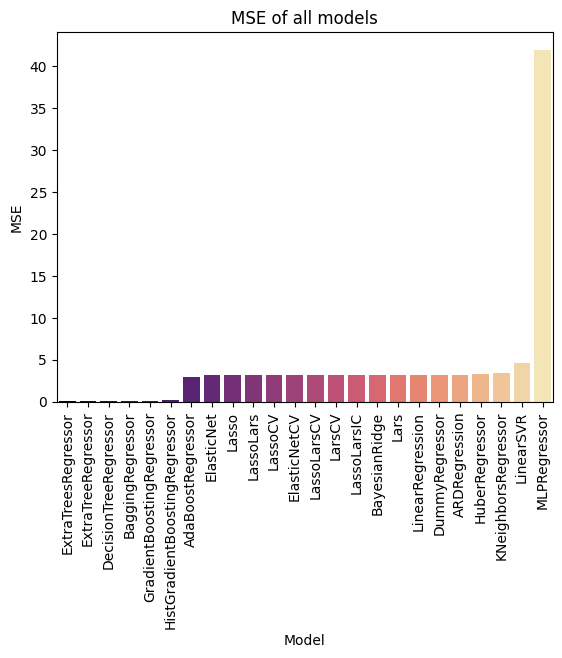

In [14]:
import seaborn as sns
sns.barplot(x = 'Model', y = 'MSE', data = df_compare, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE of all models')
plt.show()

In [15]:
df_compare = df_compare.sort_values(by = ['RMSE'], ascending = True)
best_model = pd.concat([best_model, df_compare.sort_values(by = ['MSE'], ascending = True).head(5)])
df_compare.head()

,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=1690052692), ...",ExtraTreesRegressor,0.030115,0.173537,0.990622
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.032527,0.180353,0.989871
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.067165,0.259162,0.979085
0,(DecisionTreeRegressor(random_state=1344143399...,BaggingRegressor,0.074666,0.273251,0.976749
0,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingRegressor,0.097608,0.312423,0.969605


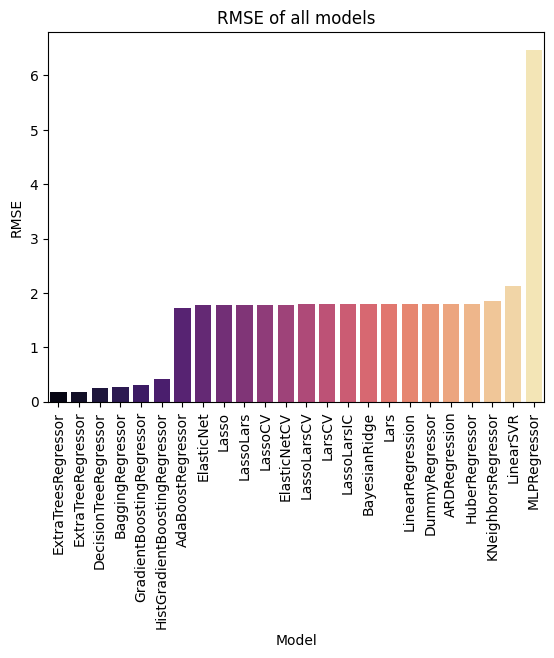

In [16]:
sns.barplot(x = 'Model', y = 'RMSE', data = df_compare, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of all models')
plt.show()

In [17]:
df_compare = df_compare[df_compare['R2'] > 0]
df_compare = df_compare.sort_values(by = ['R2'], ascending = False)
best_model = pd.concat([best_model, df_compare.sort_values(by = ['MSE'], ascending = True).head(5)])
df_compare.head()

,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=1690052692), ...",ExtraTreesRegressor,0.030115,0.173537,0.990622
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.032527,0.180353,0.989871
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.067165,0.259162,0.979085
0,(DecisionTreeRegressor(random_state=1344143399...,BaggingRegressor,0.074666,0.273251,0.976749
0,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingRegressor,0.097608,0.312423,0.969605


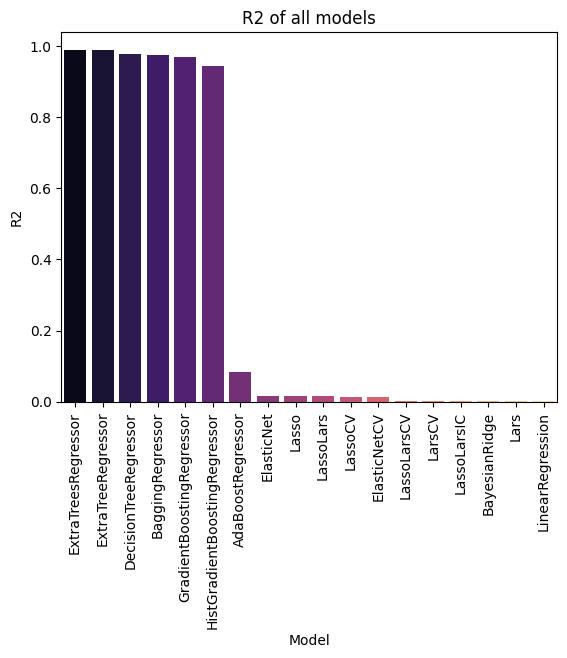

In [18]:
sns.barplot(x = 'Model', y = 'R2', data = df_compare, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 of all models')
plt.show()

In [19]:
best_model = best_model.drop_duplicates()
best_model

,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=1690052692), ...",ExtraTreesRegressor,0.030115,0.173537,0.990622
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.032527,0.180353,0.989871
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.067165,0.259162,0.979085
0,(DecisionTreeRegressor(random_state=1344143399...,BaggingRegressor,0.074666,0.273251,0.976749
0,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingRegressor,0.097608,0.312423,0.969605


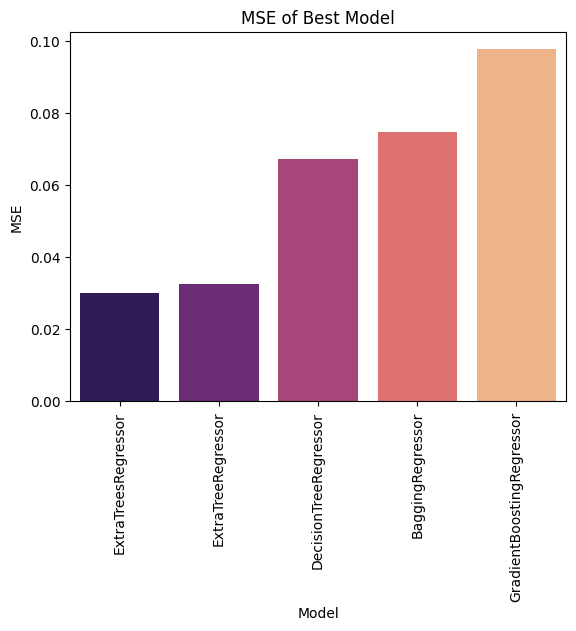

In [20]:
sns.barplot(x = 'Model', y = 'MSE', data = best_model, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE of Best Model')
plt.show()

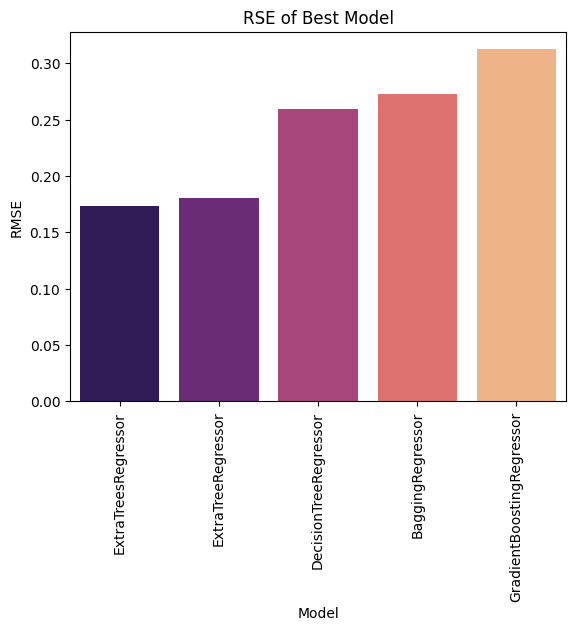

In [21]:
sns.barplot(x = 'Model', y = 'RMSE', data = best_model, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RSE of Best Model')
plt.show()

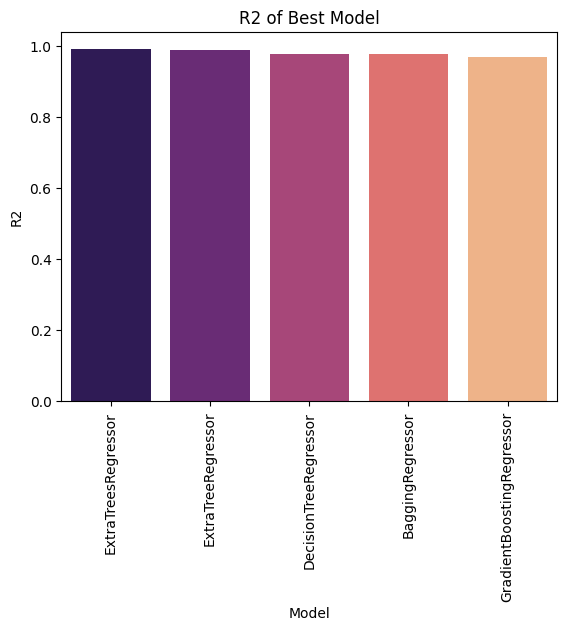

In [22]:
sns.barplot(x = 'Model', y = 'R2', data = best_model, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 of Best Model')
plt.show()

In [23]:
bestModel = set()

best_model = best_model.sort_values(by = ['MSE'], ascending = True)

for index, row in best_model.head(3).iterrows():
    bestModel.add(row['Regressor'])

best_model = best_model.sort_values(by = ['RMSE'], ascending = True)

for index, row in best_model.head(3).iterrows():
    bestModel.add(row['Regressor'])

best_model = best_model.sort_values(by = ['R2'], ascending = False)

for index, row in best_model.head(3).iterrows():
    bestModel.add(row['Regressor'])

In [24]:
def hyperparam(model, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator = model, param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}, cv = 5, n_jobs = -1, verbose = 5)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print(grid_search.best_estimator_)
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2: ', r2)
    return grid_search.best_estimator_, mse, rmse, r2

In [ ]:
for model in bestModel:
    try:
        print(model)
        hyperparam(model, X_train, y_train, X_test, y_test)            
    except:
        print('Error')

## Let us check if Neural networks will work the same or give a better result for this

In [15]:
from tensorflow import keras
from keras import layers
from keras.layers import LSTM
from keras.layers.experimental import preprocessing
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam, SGD, RMSprop
from keras.models import Sequential
from keras.layers import LSTM, Reshape

In [16]:
import keras.backend as K
def r2(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

In [17]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim = 17))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse', r2])

model.fit(X_train, y_train, epochs = 10, batch_size = 32, verbose = 1, validation_split = 0.2, callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10)])

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r2)



Epoch 1/10


4390/4390 [==============================] - 19s 4ms/step - loss: 295.7585 - mse: 295.7585 - r2: -457055.6250 - val_loss: 2.1939 - val_mse: 2.1939 - val_r2: -18.7176
Epoch 2/10
4390/4390 [==============================] - 16s 4ms/step - loss: 4.3820 - mse: 4.3820 - r2: -1715.8044 - val_loss: 2.1939 - val_mse: 2.1939 - val_r2: -10.7171
Epoch 3/10
4390/4390 [==============================] - 16s 4ms/step - loss: 3.7799 - mse: 3.7799 - r2: -578.7643 - val_loss: 2.1953 - val_mse: 2.1953 - val_r2: -3.2087
Epoch 4/10
4390/4390 [==============================] - 16s 4ms/step - loss: 3.7174 - mse: 3.7174 - r2: -101.7846 - val_loss: 2.1942 - val_mse: 2.1942 - val_r2: -24.9013
Epoch 5/10
4390/4390 [==============================] - 16s 4ms/step - loss: 3.7887 - mse: 3.7887 - r2: -90.0742 - val_loss: 2.1939 - val_mse: 2.1939 - val_r2: -10.9460
Epoch 6/10
4390/4390 [==============================] - 16s 4ms/step - loss: 3.6652 - mse: 3.6652 - r2: -14.8080 - val_loss: 2.1938 - val_ms

## R2 in Negative means the model is doing Lot worse than a constant function:
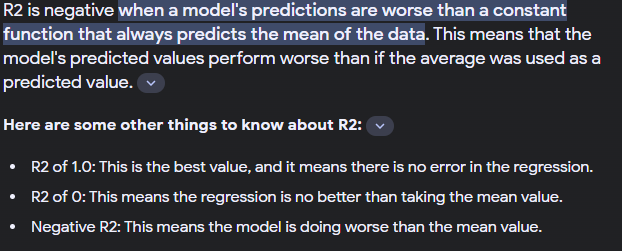

In [19]:
lstm = Sequential()
lstm.add(Reshape((1, 17), input_shape = (17,)))
lstm.add(LSTM(128, activation = 'relu', return_sequences = True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(128, activation = 'relu', return_sequences = True))
lstm.add(Dropout(0.2))
lstm.add(Dense(64, activation = 'relu'))
lstm.add(Dropout(0.2))
lstm.add(Dense(32, activation = 'relu'))

lstm.add(Dense(1, activation = 'linear'))

lstm.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse', r2])

lstm.fit(X_train, y_train, epochs = 10, batch_size = 32, verbose = 1, validation_split = 0.2, callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10)])


y_pred = lstm.predict(X_test)
y_pred = y_pred.reshape(y_pred.shape[0], y_pred.shape[1])
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r2)

Epoch 1/10


ValueError: in user code:

    File "c:\Users\cvmda\code\Manufacturing_POC\venv\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\cvmda\code\Manufacturing_POC\venv\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\cvmda\code\Manufacturing_POC\venv\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\cvmda\code\Manufacturing_POC\venv\Lib\site-packages\keras\src\engine\training.py", line 1155, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\Users\cvmda\code\Manufacturing_POC\venv\Lib\site-packages\keras\src\engine\training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\Users\cvmda\code\Manufacturing_POC\venv\Lib\site-packages\keras\src\engine\compile_utils.py", line 592, in update_state
        self.build(y_pred, y_true)
    File "c:\Users\cvmda\code\Manufacturing_POC\venv\Lib\site-packages\keras\src\engine\compile_utils.py", line 498, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(
    File "c:\Users\cvmda\code\Manufacturing_POC\venv\Lib\site-packages\keras\src\engine\compile_utils.py", line 646, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "c:\Users\cvmda\code\Manufacturing_POC\venv\Lib\site-packages\keras\src\engine\compile_utils.py", line 646, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "c:\Users\cvmda\code\Manufacturing_POC\venv\Lib\site-packages\keras\src\engine\compile_utils.py", line 665, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "c:\Users\cvmda\code\Manufacturing_POC\venv\Lib\site-packages\keras\src\metrics\__init__.py", line 224, in get
        raise ValueError(f"Could not interpret metric identifier: {identifier}")

    ValueError: Could not interpret metric identifier: -2.7281264944445383e-05


## With R2 being negative LSTM fails to make any kind of improvement.